todo
1. separate administration conflict tables and do worst case scenario tables
2. do some plotting per fband and make tables for the plotting

In [1]:
import pandas as pd
import numpy as np
import os
from IPython.display import display
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from ITUtils import *
from tqdm.notebook import tqdm
import re

# 1 Filter each administration 
do the same thing that was done for the combine table but one administration at a time and produce an output folder for every administration. 
i.e. create a administrations conflicts folder with the same output of the big file. 
use a function that takes as input 
1. the TPA table, 
2. the country code, 
3. the folder where to look for country-related databases. 
4. the folder whete to look for country-related satellite names
And produces
1. expanded_table_conflicts
2. expanded_table_conflicts_rejected 
3. expanded_table_conflicts_worstcase (one entry per satellite name containing the worst-case conflict in every column)

In [2]:
tpafile = './databases/TPAtable.csv'
refdf = pd.read_csv(tpafile)
with open('countrieslist.csv', 'r') as f:
    countries = f.read().strip().split(', ')
print(countries)  # ok 
tablesfolder = 'countriestables'
satnamesfolder = 'satellitenames'
outfolder = 'adm_conflicts'
if not os.path.exists(outfolder):
    os.makedirs(outfolder)


['AFS', 'ARS', 'AUS', 'CAN', 'CHN', 'D', 'E', 'EGY', 'F', 'G', 'GRC', 'HOL', 'I', 'IRN', 'ISR', 'J', 'KAZ', 'KOR', 'LUX', 'MLA', 'MRC', 'NOR', 'PAK', 'POR', 'RUS', 'SLM', 'THA', 'USA']


In [3]:
# debug
ccode = 'RUS'
noinfo = country_conflicts_finder(ccode, refdf, tablesfolder, satnamesfolder, os.path.join(outfolder, ccode))

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
loading  RUS.csv
finding conflicts for  RUS
INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


file saved to  adm_conflicts/RUS/conflicts.csv
satellite names for RUS  : 
 ['CHALLENGEONE', 'SPUTNIX', 'CSDRN-M', 'WSDRN-M', 'VSSRD-2M', 'KANOPUS-V', 'UCTS-ISS', 'ESDRN-M', 'METEOR-3M', 'ARCTICA-M', 'GOMS-166E', 'GOMS-14.5W', 'GOMS-M', 'RASSVET', 'PROGNOZ-1', 'PROGNOZ-2', 'PROGNOZ-3', 'PROGNOZ-4', 'PROGNOZ-5', 'PROGNOZ-6', 'PROGNOZ-7', 'PROGNOZ-8', 'PROGNOZ-N', 'GEO-IK-2', 'GLONASS-M']


/home/simone/PycharmProjects/TPA1_ITU_SE_SIEVE/ITUtils.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf[['tpaconflicts', 'percentoverlap']] = ddf.parallel_apply(


,com_el.ntc_id,com_el.tgt_ntc_id,com_el.adm,com_el.ntwk_org,com_el.sat_name,com_el.long_nom,com_el.prov,com_el.d_rcv,com_el.st_cur,orbit.orb_id,...,grp.f_biu,emiss.seq_no,emiss.pwr_ds_max,emiss.design_emi,carrier_fr.freq_carr,channel.bandwidth,channel.freq_min,channel.freq_max,tpaconflicts,percentoverlap
1,90500528,NaN,RUS,NaN,PROGNOZ-2,12.0,RR1488,02.08.1984,50,NaN,...,C,1.0,-68.0,20M0FXX--,NaN,20000000.0,NaN,NaN,,
2,92540003,NaN,RUS,NaN,GLONASS-M,NaN,9.1/IA,03.02.2020,50,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
3,90500530,NaN,RUS,NaN,PROGNOZ-4,80.0,11.2,21.03.2002,50,NaN,...,C,1.0,-68.0,20M0FXX--,NaN,20000000.0,NaN,NaN,,
4,92540003,NaN,RUS,NaN,GLONASS-M,NaN,9.1/IA,03.02.2020,50,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
5,90500529,NaN,RUS,NaN,PROGNOZ-3,35.0,RR1488,02.08.1984,50,NaN,...,C,1.0,-68.0,20M0FXX--,NaN,20000000.0,NaN,NaN,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,122520185,NaN,RUS,NaN,PROGNOZ-4,80.0,9.6,30.11.2022,50,NaN,...,NaN,1.0,-59.0,4M00G1D--,NaN,4000000.0,NaN,NaN,,
1635,122520186,NaN,RUS,NaN,PROGNOZ-3,35.0,9.6,30.11.2022,50,NaN,...,NaN,1.0,-59.0,4M00G1D--,NaN,4000000.0,NaN,NaN,,
1639,122520187,NaN,RUS,NaN,PROGNOZ-2,12.0,9.6,30.11.2022,50,NaN,...,NaN,1.0,-59.0,4M00G1D--,NaN,4000000.0,NaN,NaN,,
1643,122520187,NaN,RUS,NaN,PROGNOZ-2,12.0,9.6,30.11.2022,50,NaN,...,NaN,3.0,-68.1,32M0G1D--,NaN,32000000.0,NaN,NaN,,


names with no frequency info ['PROGNOZ-2', 'GLONASS-M', 'PROGNOZ-4', 'PROGNOZ-3', 'PROGNOZ-1', 'PROGNOZ-6', 'GOMS-M', 'PROGNOZ-7', 'GEO-IK-2', 'PROGNOZ-5', 'PROGNOZ-8', 'CSDRN-M', 'METEOR-3M', 'VSSRD-2M', 'WSDRN-M', 'UCTS-ISS', 'GOMS-14.5W', 'KANOPUS-V', 'ARCTICA-M', 'GOMS-166E', 'ESDRN-M']
expanding the conflict columns for RUS
INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
['TPA1.401.95525-401.96475_R', 'TPA1.401.9501-401.9699_R', 'TPA1.2055.475-2055.725_R', 'TPA1.401.89525-401.90475_R', 'TPA1.2237.0-2238.0_E', 'TPA1.2065.575-2065.825_R', 'TPA1.401.9501-401.9699_E', 'TPA1.401.8901-401.9099_R', 'TPA1.401.95525-401.96475_E', 'TPA1.401.8901-401.9099_E', 'TPA1.401.89525-401.90475_E', 'TPA1.2202.4-2203.4_E']


INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
['TPA1.401.95525-401.96475_R', 'TPA1.401.9501-401.9699_R', 'TPA1.2055.475-2055.725_R', 'TPA1.401.89525-401.90475_R', 'TPA1.2237.0-2238.0_E', 'TPA1.2065.575-2065.825_R', 'TPA1.401.9501-401.9699_E', 'TPA1.401.8901-401.9099_R', 'TPA1.401.95525-401.96475_E', 'TPA1.401.8901-401.9099_E', 'TPA1.401.89525-401.90475_E', 'TPA1.2202.4-2203.4_E']
table saved to adm_conflicts/RUS/output_tables/TPA1.401.95525-401.96475_R_E.csv
table saved to adm_conflicts/RUS/output_tables/TPA1.401.95525-401.96475_R_R.csv
table saved to adm_conflicts/RUS/output_tables/TPA1.401.95525-401.96475_R_E_worstcase.csv
table saved to adm_conflicts/RUS/output_tables/TPA1.401.95525-401.96475_R_R_worstcase.csv
table saved to adm_conflicts/RUS/output_tables/TPA1.401.9501-401.9699_R_E.csv
table saved to adm_conflicts/RUS/output_tables/TPA1.401.9501-401.9699_R_R.csv
table saved to adm_confli

In [4]:
print(noinfo)
# create a file 
with open(os.path.join(outfolder, ccode, 'noinfooncarrierfrequency.txt'), 'w') as f:
    f.write(
        'The following list contains all the satellite names for which no information on the carrier frequency was found in the ITU database for at least one of the entries.\nIt is possible that the same satellite has other entries with all the required information for channel overlap comparisons\n\n')
    f.write('\n')
    f.write(str(noinfo))

['PROGNOZ-2', 'GLONASS-M', 'PROGNOZ-4', 'PROGNOZ-3', 'PROGNOZ-1', 'PROGNOZ-6', 'GOMS-M', 'PROGNOZ-7', 'GEO-IK-2', 'PROGNOZ-5', 'PROGNOZ-8', 'CSDRN-M', 'METEOR-3M', 'VSSRD-2M', 'WSDRN-M', 'UCTS-ISS', 'GOMS-14.5W', 'KANOPUS-V', 'ARCTICA-M', 'GOMS-166E', 'ESDRN-M']


# 2 Produce a summaryfile
1. a table that contains for every conflict type a list of satellite name:  
        this can be obtained by looking at the output simplified tables and printing all the names drop R_E
2. produce a bar plot of all the uhf and sband conflicts dropping the R_E cases and coloring the sections of the bar by conflict type
3. produce a table by satellite name vs conflict type with worst-case percentage at the cross

In [5]:
folder = os.path.join(outfolder, ccode, 'output_tables')
all_files = os.listdir(folder)
worstcase_files = [f for f in all_files if 'worstcase' in f.lower()]
# drop al files containing the string 'R
files = []
for f in worstcase_files:
    if not 'R_E' in f:
        files.append(f)
print(files)
fmins = []
fmax = []
f0 = []
bw = []
types = []
dataframes = []
satnames_lists = []
for ff in files:
    match = re.search(r'(\d+\.\d+)-(\d+\.\d+)_([A-Z]_[A-Z])', ff)
    if match:
        fmin = float(match.group(1))
        fmax_ = float(match.group(2))
        f0_ = (fmin + fmax_) / 2
        bw_ = round(1e6 * (fmax_ - fmin))
        df = pd.read_csv(os.path.join(folder, ff), low_memory=False)
        type = str(match.group(3))
        fmins.append(fmin)
        fmax.append(fmax_)
        f0.append(f0_)
        bw.append(bw_)
        dataframes.append(df)
        types.append(type)
        satnames = df[' com_el.sat_name'].unique()
        satnames_lists.append(satnames)
        

['TPA1.401.8901-401.9099_E_R_worstcase.csv', 'TPA1.2065.575-2065.825_R_R_worstcase.csv', 'TPA1.401.9501-401.9699_E_E_worstcase.csv', 'TPA1.2055.475-2055.725_R_R_worstcase.csv', 'TPA1.401.95525-401.96475_E_E_worstcase.csv', 'TPA1.401.89525-401.90475_E_E_worstcase.csv', 'TPA1.401.8901-401.9099_R_R_worstcase.csv', 'TPA1.401.9501-401.9699_E_R_worstcase.csv', 'TPA1.2237.0-2238.0_E_E_worstcase.csv', 'TPA1.401.89525-401.90475_E_R_worstcase.csv', 'TPA1.401.95525-401.96475_E_R_worstcase.csv', 'TPA1.2202.4-2203.4_E_E_worstcase.csv', 'TPA1.401.89525-401.90475_R_R_worstcase.csv', 'TPA1.401.9501-401.9699_R_R_worstcase.csv', 'TPA1.401.8901-401.9099_E_E_worstcase.csv', 'TPA1.401.95525-401.96475_R_R_worstcase.csv']


In [6]:
# export summary csv

summary = []

for f0_, bw_, ctype, sats in zip(f0, bw, types, satnames_lists):
    row = {
        'f0': f0_,
        'bandwidth': bw_,
        'conflict_type': ctype,
        'satellite_names': ', '.join(sats),
        'satellite_count': len(sats)
    }
    summary.append(row)

# Create DataFrame
df_summary = pd.DataFrame(summary)

# Export to CSV
df_summary.to_csv(os.path.join(outfolder, ccode, 'conflict_summary_by_freq_type.csv'), index=False)

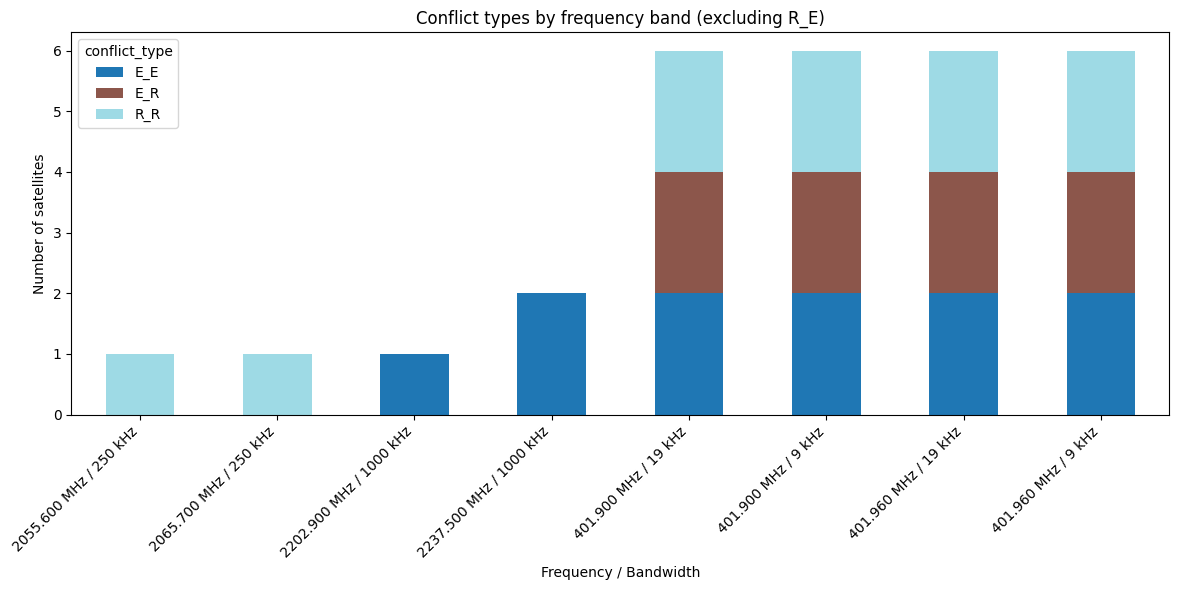

✅ Plot saved to: adm_conflicts/RUS/conflict_type_barplot.png


In [7]:
# plots
import matplotlib.pyplot as plt

# Step 1: Create labeled summary with satellite count (reusing earlier step)
records = []

for f0_, bw_, ctype, sats in zip(f0, bw, types, satnames_lists):
    if ctype == 'R_E':
        continue  # Skip R_E

    label = f"{f0_:.3f} MHz / {bw_//1000} kHz"
    records.append({
        'freq_band': label,
        'conflict_type': ctype,
        'satellite_count': len(sats)
    })

df_plot = pd.DataFrame(records)

# Step 2: Pivot table so we get stacked bar structure
pivot = df_plot.pivot_table(
    index='freq_band',
    columns='conflict_type',
    values='satellite_count',
    aggfunc='sum',
    fill_value=0
)

# Step 3: Plot
ax = pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

plt.ylabel('Number of satellites')
plt.xlabel('Frequency / Bandwidth')
plt.title('Conflict types by frequency band (excluding R_E)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot
plot_path = os.path.join(outfolder, ccode, 'conflict_type_barplot.png')
plt.savefig(plot_path, dpi=300)
plt.show()

print(f"✅ Plot saved to: {plot_path}")


In [8]:
folder = os.path.join(outfolder, ccode, 'output_tables')
all_files = os.listdir(folder)
worstcase_files = [f for f in all_files if 'worstcase' in f.lower()]
# drop al files containing the string 'R
files = []
for f in worstcase_files:
    if not 'R_E' in f:
        files.append(f)
print(files)
fmins = []
fmax = []
f0 = []
bw = []
types = []
dataframes = []
satnames_lists = []
for ff in files:
    match = re.search(r'(\d+\.\d+)-(\d+\.\d+)_([A-Z]_[A-Z])', ff)
    if match:
        fmin = float(match.group(1))
        fmax_ = float(match.group(2))
        f0_ = (fmin + fmax_) / 2
        bw_ = round(1e6 * (fmax_ - fmin))
        df = pd.read_csv(os.path.join(folder, ff), low_memory=False)
        type = str(match.group(3))
        fmins.append(fmin)
        fmax.append(fmax_)
        f0.append(f0_)
        bw.append(bw_)
        dataframes.append(df)
        types.append(type)
        satnames = df[' com_el.sat_name'].unique()
        satnames_lists.append(satnames)

['TPA1.401.8901-401.9099_E_R_worstcase.csv', 'TPA1.2065.575-2065.825_R_R_worstcase.csv', 'TPA1.401.9501-401.9699_E_E_worstcase.csv', 'TPA1.2055.475-2055.725_R_R_worstcase.csv', 'TPA1.401.95525-401.96475_E_E_worstcase.csv', 'TPA1.401.89525-401.90475_E_E_worstcase.csv', 'TPA1.401.8901-401.9099_R_R_worstcase.csv', 'TPA1.401.9501-401.9699_E_R_worstcase.csv', 'TPA1.2237.0-2238.0_E_E_worstcase.csv', 'TPA1.401.89525-401.90475_E_R_worstcase.csv', 'TPA1.401.95525-401.96475_E_R_worstcase.csv', 'TPA1.2202.4-2203.4_E_E_worstcase.csv', 'TPA1.401.89525-401.90475_R_R_worstcase.csv', 'TPA1.401.9501-401.9699_R_R_worstcase.csv', 'TPA1.401.8901-401.9099_E_E_worstcase.csv', 'TPA1.401.95525-401.96475_R_R_worstcase.csv']


In [9]:

from collections import defaultdict
import re
import pandas as pd

# Prepare the conflict map: satellite name -> conflict type label -> percentage
sat_conflict_map = defaultdict(lambda: defaultdict(int))

# Loop through all collected info
for ff, fmin, fmax_, f0_, bw_, conflict_type, satnames, df in zip(files, fmins, fmax, f0, bw, types, satnames_lists,
                                                                  dataframes):
    # Get the correct column name from the filename (strip off _XX and keep only _R or _E)
    col_prefix = ff.split('_')[0]  # e.g., TPA1.401.95525-401.96475
    col_suffix = conflict_type[0]  # take only 'R' or 'E'
    conflict_column = f"{col_prefix}_{col_suffix}"

    if conflict_column not in df.columns:
        print(f"⚠️ Column {conflict_column} not found in DataFrame for file: {ff}")
        continue

    for satname in satnames:
        satname = satname.strip()
        try:
            val = df[df[' com_el.sat_name'] == satname][conflict_column].values[0]
        except IndexError:
            continue  # Satellite not found in this dataframe

        if isinstance(val, str) and '%' in val:
            try:
                percent = int(re.search(r'(\d+)', val).group(1))
                conflict_label = f"{f0_:.3f}_{bw_ // 1000}kHz_{conflict_type}"
                sat_conflict_map[satname][conflict_label] = max(
                    sat_conflict_map[satname][conflict_label], percent
                )
            except Exception as e:
                print(f"⚠️ Could not parse value '{val}' for satellite {satname}: {e}")
                continue

# Create records for the pivot table
records = []
for satname, conflicts in sat_conflict_map.items():
    for conflict_label, percent in conflicts.items():
        records.append({
            'sat_name': satname,
            'conflict_type': conflict_label,
            'worst_case_percent': percent
        })

# Convert to DataFrame and pivot
df_pivot_source = pd.DataFrame(records)

if df_pivot_source.empty:
    print("⚠️ No data to create pivot table.")
else:
    pivot_table = df_pivot_source.pivot(
        index='sat_name',
        columns='conflict_type',
        values='worst_case_percent'
    )

    # Export the pivot table
    pivot_path = os.path.join(outfolder, ccode, 'conflict_percent_pivot_table.csv')
    pivot_table.to_csv(pivot_path)
    print(f"✅ Pivot table saved to: {pivot_path}")
    display(pivot_table)


✅ Pivot table saved to: adm_conflicts/RUS/conflict_percent_pivot_table.csv


conflict_type,2055.600_250kHz_R_R,2065.700_250kHz_R_R,2202.900_1000kHz_E_E,2237.500_1000kHz_E_E,401.900_19kHz_E_E,401.900_19kHz_E_R,401.900_19kHz_R_R,401.900_9kHz_E_E,401.900_9kHz_E_R,401.900_9kHz_R_R,401.960_19kHz_E_E,401.960_19kHz_E_R,401.960_19kHz_R_R,401.960_9kHz_E_E,401.960_9kHz_E_R,401.960_9kHz_R_R
sat_name,,,,,,,,,,,,,,,,
CHALLENGEONE,NaN,NaN,NaN,NaN,95.0,95.0,95.0,45.0,45.0,45.0,85.0,85.0,85.0,45.0,45.0,45.0
PROGNOZ-N,NaN,NaN,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SPUTNIX,NaN,NaN,NaN,NaN,100.0,100.0,100.0,95.0,95.0,95.0,100.0,100.0,100.0,95.0,95.0,95.0
UCTS-ISS,4.0,4.0,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
